<a href="https://colab.research.google.com/github/travisnmiles/OMDA/blob/main/intro-to-mapping/mapping_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapping in Python  
Now that we have the basics down from last week's lab, we can learn how to create maps using python. In oceanography, we frequently deal with maps to convey spatial data like fields of sea surface temperature or wind speed. Below is an example of what you can do with mapping in Python from Sam Coakley's Masters Thesis. The map shows the East China Sea with the depth of the water in color, the change in sea surface temperature of the last few days as contours, and the path of a tropical cyclone plotted as a line across the map. Mapping is a valuable tool because can give a science story context.

<img src="https://github.com/travisnmiles/OMDA/blob/main/intro-to-mapping/soulik_map.png?raw=1" width=400 height=400 />

We will be using a few new packages today to work with new data sets and to build maps! So we can install these new packages below. As with last class, you only need to run this cell once so you can comment it out with ### after you run it

In [18]:
# Install necessary packages

# !pip install pandas
# !pip install cartopy
# !pip install netcdf4


It is the 'best practice' in python to do all of your pacakge importing at the top of your notebook

In [19]:
# This is a magic function that lets jupyter know we are going to plot in this notebook

# Import the necessary packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import xarray as xr

We are going to use `cartopy` to make our maps and `pandas` to deal with tabular data.

# Mapping Basics

Today, we are going to plot maps in python using cartopy. This is different than making a regular plot in python because we have to let matplotlib know that we are working with geographical data which we do by making a GeoAxes and assigning our plotting area a projection. A projection is the method used to 'flatten' our spherical planet into a 2D plot.

<GeoAxes: >

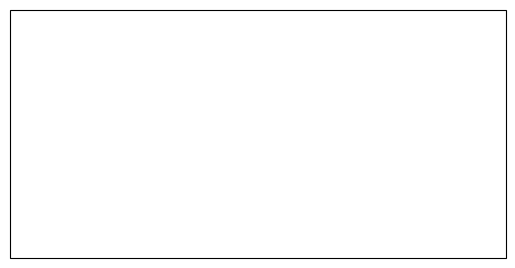

In [20]:
plt.figure() # Create our plotting area
ax = plt.axes(projection=ccrs.PlateCarree()) # Creates an axis and tells matplotlib that we want it to be a map
ax # prints the axis to the screen

If everything worked, you should have a very boring box but the text above the very boring box tells us that matplotlib knows that we are dealing with a map.

Now `ax` is a Cartopy object and contains all the features of cartopy.  
Let's try to make this box a little more interesting.

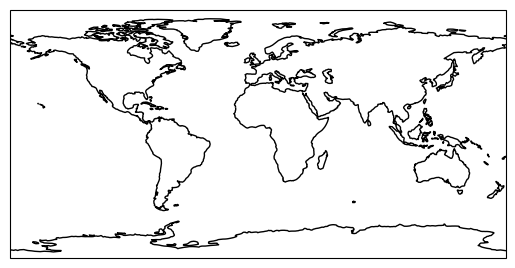

In [21]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

`ax.coastlines()` tells python to plot the stock coastline information onto the map. `cartopy` has a lot of features like this where we can add details to our map without having to go through the trouble of loading data

### Useful methods of a GeoAxes
The GeoAxes class adds a number of useful methods.

Let's take a look at:

- `set_global` - zoom the map out as much as possible
- `set_extent` - zoom the map to the given bounding box
- `gridlines` - add a graticule (and optionally labels) to the axes
- `coastlines` - add Natural Earth coastlines to the axes
- `stock_img` - add a low-resolution Natural Earth background image to the axes
- `imshow` - add an image (numpy array) to the axes
- `add_geometries` - add a collection of geometries (Shapely) to the axes

Now let's add a stock image and gridlines

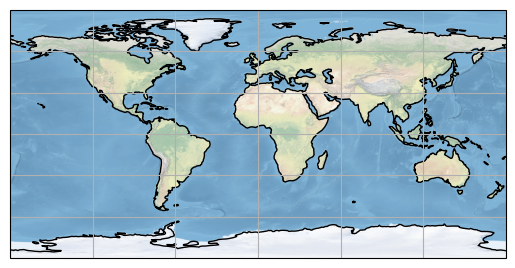

In [22]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.stock_img()

# Plotting points on a map  
We can add data to the maps by using some familiar commands from matplotlib.  
We will be using a new type of data structure. Last week we used `numpy` and `ndarray`'s to load in and manipulate data. A down side of the `ndarray` is that is doesn't contain any information about what the data means. We call this information "metadata".  
Today we will use `pandas` to load in a `.csv` as a pandas `DataFrame`. The `DataFrame` data structure has `keys` for each column that tell you about what the column represents.  
Let's see how this works below with a `.csv` of a RU locations across New Jersey.

In [23]:
labs = pd.read_csv('https://raw.githubusercontent.com/travisnmiles/OMDA/refs/heads/main/intro-to-mapping/RU_lab_coordinates.csv')

print(labs)
print(labs.keys())
print(type(labs))

                         Location Abbrev.   Latitude  Longitude
0                      Haskin Lab    HSRL  39.233933 -75.031133
1                  Cape Shore Lab      CS  39.073667 -74.912633
2   Aquaculture Innovation Center     AIC  38.969493 -74.941066
3  Fisheries Collaborative Center     FCC  38.945404 -74.898538
4           Jacques Cousteau NERR  JCNERR  39.594702 -74.346575
5            Marine Field Station   RUMFS  39.508947 -74.324152
6          Rutgers Passion Puddle    RUPP  40.482465 -74.437177
7                   Morgan Marina      MM  40.455206 -74.272124
8                  Crew Boathouse    CREW  40.487886 -74.433386
Index(['Location', 'Abbrev.', 'Latitude', 'Longitude'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


From `print(labs)` we can see that each column has a header (aka `key`) that tells us what the data in the column is. All the way on the left, we can see the index of each of the entries in each column.  
  
The `DataFrame` allows us to load in a `.csv` that contains data of many `types`. In the `Location` column, the data are strings. In the `Latitude` column, the data are numbers (aka `floats`).  
  
A new data structure means that there is a new way to access the data inside of it.

In [24]:
print(labs['Latitude']) # to see all the data under one column or key of a dataframe

0    39.233933
1    39.073667
2    38.969493
3    38.945404
4    39.594702
5    39.508947
6    40.482465
7    40.455206
8    40.487886
Name: Latitude, dtype: float64


In [25]:
print(labs['Location'][0]) # To pull out one data point using the index of the data frame that appears on the left of our data.

Haskin Lab


In [26]:
print(labs['Abbrev.'][1:4]) # we can still slice just like in numpy arrays

1     CS
2    AIC
3    FCC
Name: Abbrev., dtype: object


Splendid! Now let's add some data to our plot. All we need to do is use `scatter` to add dots!

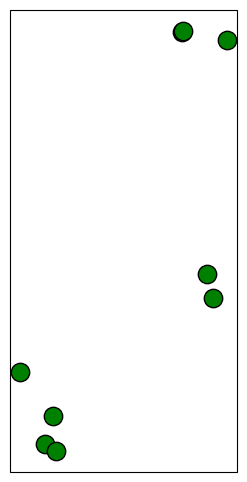

In [27]:
# Create a space to make the plot
fig = plt.figure(figsize=(5,6))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

Wow those sure are green dots! This still doesn't look much like a map so we need to add some features from `cartopy`

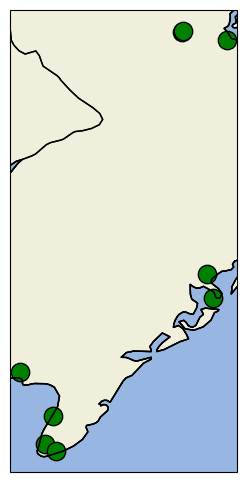

In [28]:
fig = plt.figure(figsize=(4,6))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map


Ok cool! Now we can tell that some points are on the coastline while others are further inshore. I want to zoom out a bit to get a better view of New Jersey but first we need to add x and y information on the axes so we know how far to zoom out

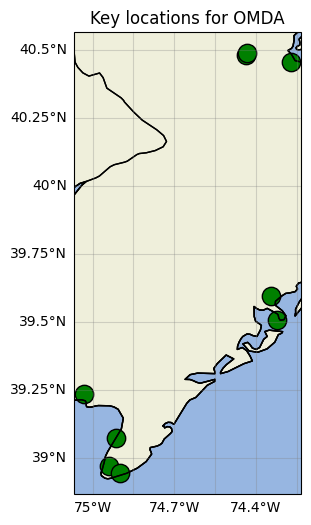

In [29]:
fig = plt.figure(figsize=(4,6))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3) # adds grid lines to the plot
gl.top_labels = False # turn off the axis labels on the top of the plot
gl.right_labels = False # turn off the axis labels on the right of the plot
gl.xformatter = LONGITUDE_FORMATTER # these let matplotlib know that the x and y axis are longitude and latitude data and to add °W °N
gl.yformatter = LATITUDE_FORMATTER


Now we can see where we are with the Lat/Lon but let's zoom out a little to provide more spatial context using `ax.set_extent`

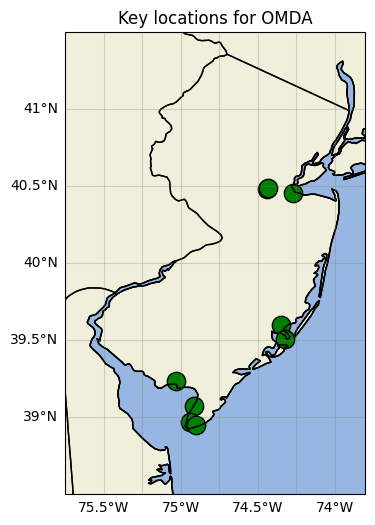

In [30]:
fig = plt.figure(figsize=(4,6))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# We can set the x and y limits of the plot using ax.set_extent
# This can be used to zoom in and out of particular areas of the map
lon1 = -75.75
lon2 = -73.8
lat1 = 41.5
lat2 = 38.5
extent=[lon1, lon2, lat1, lat2] # Play with this to zoom out enough to provide context
ax.set_extent(extent)

I want to mark Passion Puddle with a Scarlet marker because go knights and I will add a legend to the map to let everyone else know what the red dot means.

In [31]:
print(labs) # Passion Puddle is at index 6

                         Location Abbrev.   Latitude  Longitude
0                      Haskin Lab    HSRL  39.233933 -75.031133
1                  Cape Shore Lab      CS  39.073667 -74.912633
2   Aquaculture Innovation Center     AIC  38.969493 -74.941066
3  Fisheries Collaborative Center     FCC  38.945404 -74.898538
4           Jacques Cousteau NERR  JCNERR  39.594702 -74.346575
5            Marine Field Station   RUMFS  39.508947 -74.324152
6          Rutgers Passion Puddle    RUPP  40.482465 -74.437177
7                   Morgan Marina      MM  40.455206 -74.272124
8                  Crew Boathouse    CREW  40.487886 -74.433386


### Brief Protip:
If our data set was thousands of points long, using `print(labs)` would spit out a lot of information and that would not really help us find the index. Below is a good method for finding a matching value.  
`np.where` returns a list of indices where the value on the right of the `==` matches exactly with a value in the array on the left

In [32]:
print(np.where(labs['Location'] == 'Rutgers Passion Puddle')[0])

[6]


### End Protip

Passion Puddle is at index 6 so we can add another `scatter` command to plot just that one value in its own color and to give it a label

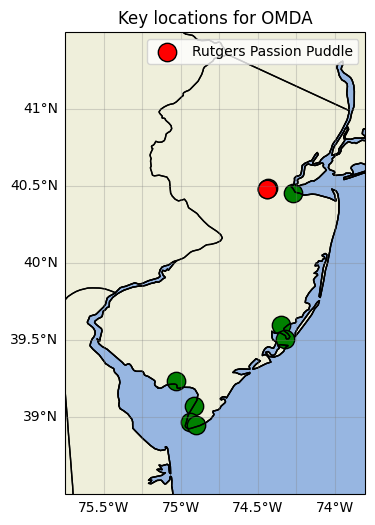

In [33]:
fig = plt.figure(figsize=(4,6))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

# Plots just one point and gives it a label based on the Location column
ax.scatter(labs['Longitude'][6], labs['Latitude'][6], s=175, c='red',edgecolor='black', label=labs['Location'][6]);
plt.legend() # adds a legend to the map


# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# We can set the x and y limits of the plot using ax.set_extent
# This can be used to zoom in and out of particular areas of the map
lon1 = -75.75
lon2 = -73.8
lat1 = 41.5
lat2 = 38.5
extent=[lon1, lon2, lat1, lat2] # Play with this to zoom out enough to provide context
ax.set_extent(extent)

Finally, we can play with the projection of the map by changing `ccrs.PlateCarree()` to `ccrs.Sinusoidal()`. However, when we do that, we need to change our scatter command by adding a keyword argument `transform`. We use `transform` to tell python what coordinate system our data is defined in.

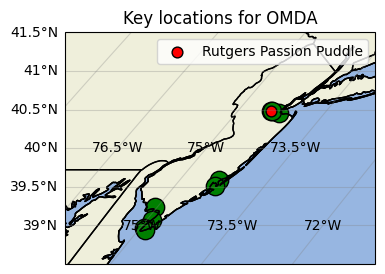

In [34]:
fig = plt.figure(figsize=(4,6))
ax = plt.axes(projection = ccrs.Sinusoidal())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black', transform=ccrs.PlateCarree()); # Plots the individual points on the map

# Plots just one point and gives it a label based on the Location column
ax.scatter(labs['Longitude'][6], labs['Latitude'][6], s=60, c='red',edgecolor='black', label=labs['Location'][6], transform=ccrs.PlateCarree());
plt.legend() # adds a legend to the map


# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# We can set the x and y limits of the plot using ax.set_extent
# This can be used to zoom in and out of particular areas of the map
lon1 = -75.75
lon2 = -73.8
lat1 = 41.5
lat2 = 38.5
extent=[lon1, lon2, lat1, lat2] # Play with this to zoom out enough to provide context
ax.set_extent(extent)

# Plotting small geographic features

Adding fine geographic details to a map  While cartopy's stock images and natural features can be helpful for larger maps, sometimes we need to see fine scale detail that isn't included in these datasets. We can plot higher resolution images of terrain on top of our basemap. The existing maps we have been looking at do not have the upstream extent of the Raritan so we can load in a Raritan watershed elevation data product which you will need in your homework and subsequent assignments when making a plot of the Raritan River.

In [35]:
import urllib.request
download_url = "https://tds.marine.rutgers.edu/erddap/griddap/RARITAN_ELEVATION.nc"
urllib.request.urlretrieve(download_url, 'RARITAN_ELEVATION.nc')
raritan = xr.open_dataset('RARITAN_ELEVATION.nc')
raritan

<xarray.Dataset> Size: 71MB
Dimensions:    (longitude: 2231, latitude: 2001)
Coordinates:
  * longitude  (longitude) float32 9kB -74.56 -74.56 -74.56 ... -74.27 -74.27
  * latitude   (latitude) float32 8kB 40.4 40.4 40.4 40.4 ... 40.6 40.6 40.6
Data variables:
    z          (longitude, latitude) float64 36MB ...
    mask       (longitude, latitude) float64 36MB ...
Attributes: (12/26)
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    defaultGraphQuery:         z&.draw=surface&.vars=lon,lat,z
    Easternmost_Easting:       -74.2701
    geospatial_lat_max:        40.6
    geospatial_lat_min:        40.4
    ...                        ...
    standard_name_vocabulary:  CF Standard Name Table v29
    Summary:                   This is a synthesized elevation dataset of the...
    summary:                   This is a synthesized elevation dataset of the...
    Title:                     Rartian River Basin Elevation Data.
    title:                     Rartian River Basin Elevation Data.
    Westernmost_Easting:       -74.56

## Adding bathymetry to basemap
Let's now add this Raritan bathymetry product to our basemap and see what it looks like. We can do that with the plt.contourf() function but because the raritain dataset has latitude, longitude, and depth (i.e. it is spatial data) we need to tell plt.contourf() the map projection.

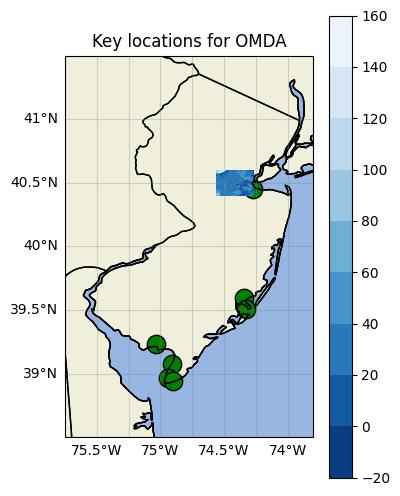

In [36]:
fig = plt.figure(figsize=(4,6))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# We can set the x and y limits of the plot using ax.set_extent
# This can be used to zoom in and out of particular areas of the map
lon1 = -75.75
lon2 = -73.8
lat1 = 41.5
lat2 = 38.5
extent=[lon1, lon2, lat1, lat2] # Play with this to zoom out enough to provide context
ax.set_extent(extent)

## This is where we add the bathymetry!
bathy = plt.contourf(raritan.longitude, raritan.latitude,raritan.z.transpose(),transform=ccrs.PlateCarree(), cmap='Blues_r')
fig.colorbar(bathy)

Well that's cool and all but not very information. Let's zoom in with set_extent()

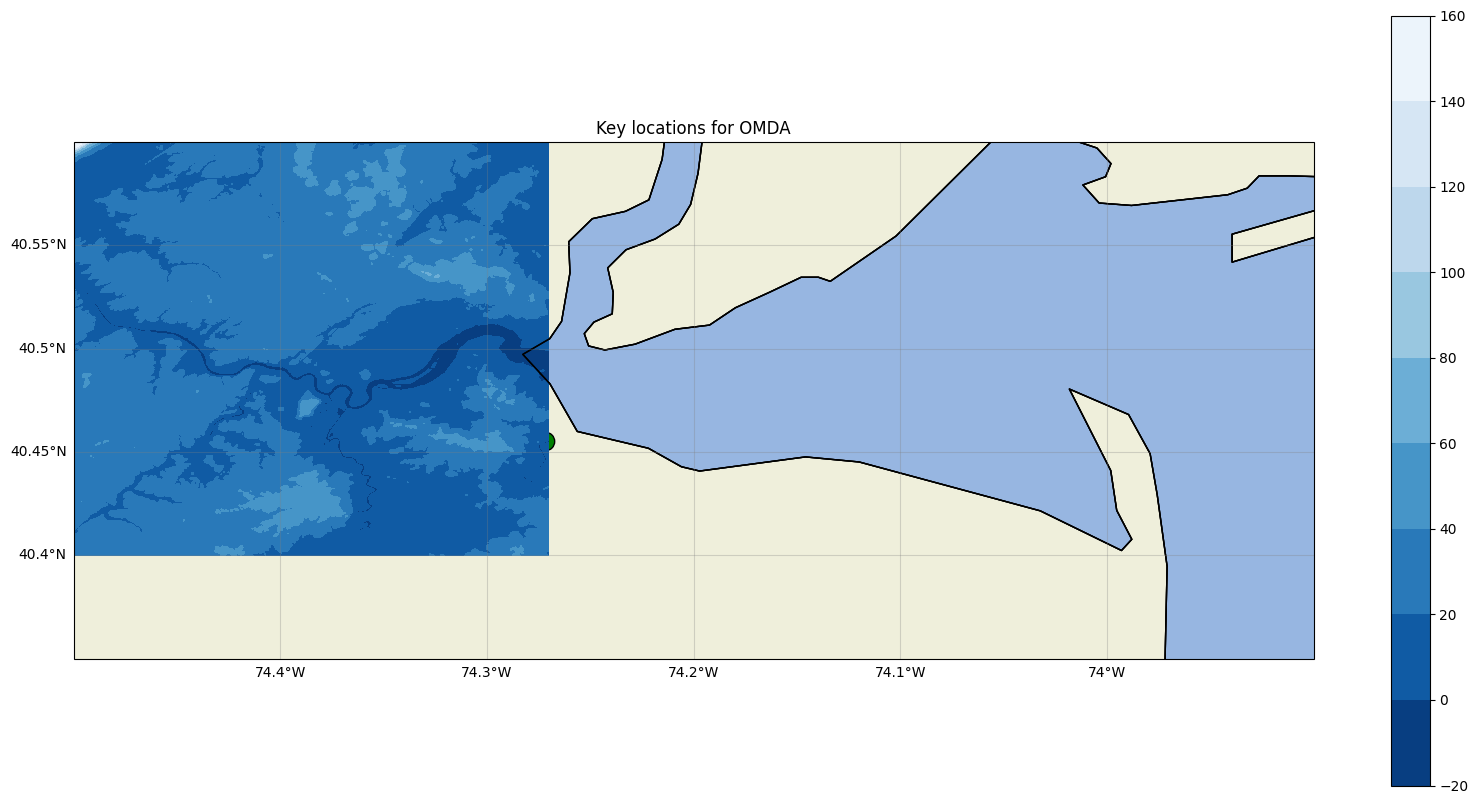

In [37]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# We can set the x and y limits of the plot using ax.set_extent
# This can be used to zoom in and out of particular areas of the map
lon1 = -74.5
lon2 = -73.9
lat1 = 40.35
lat2 = 40.6
extent=[lon1, lon2, lat1, lat2] # Play with this to zoom out enough to provide context
ax.set_extent(extent)

bathy = plt.contourf(raritan.longitude, raritan.latitude,raritan.z.transpose(),transform=ccrs.PlateCarree(), cmap='Blues_r')
fig.colorbar(bathy)

That's better but now we don't see our important points! We can fix this with zorder. Let's also fix our colorbar ranges with the 'levels' argument in plt.contourf(). Since we can see that there is not very good resolution in the river (but better than cartopy's basemaps) let's ditch the colorbar and only show the extent of the river.

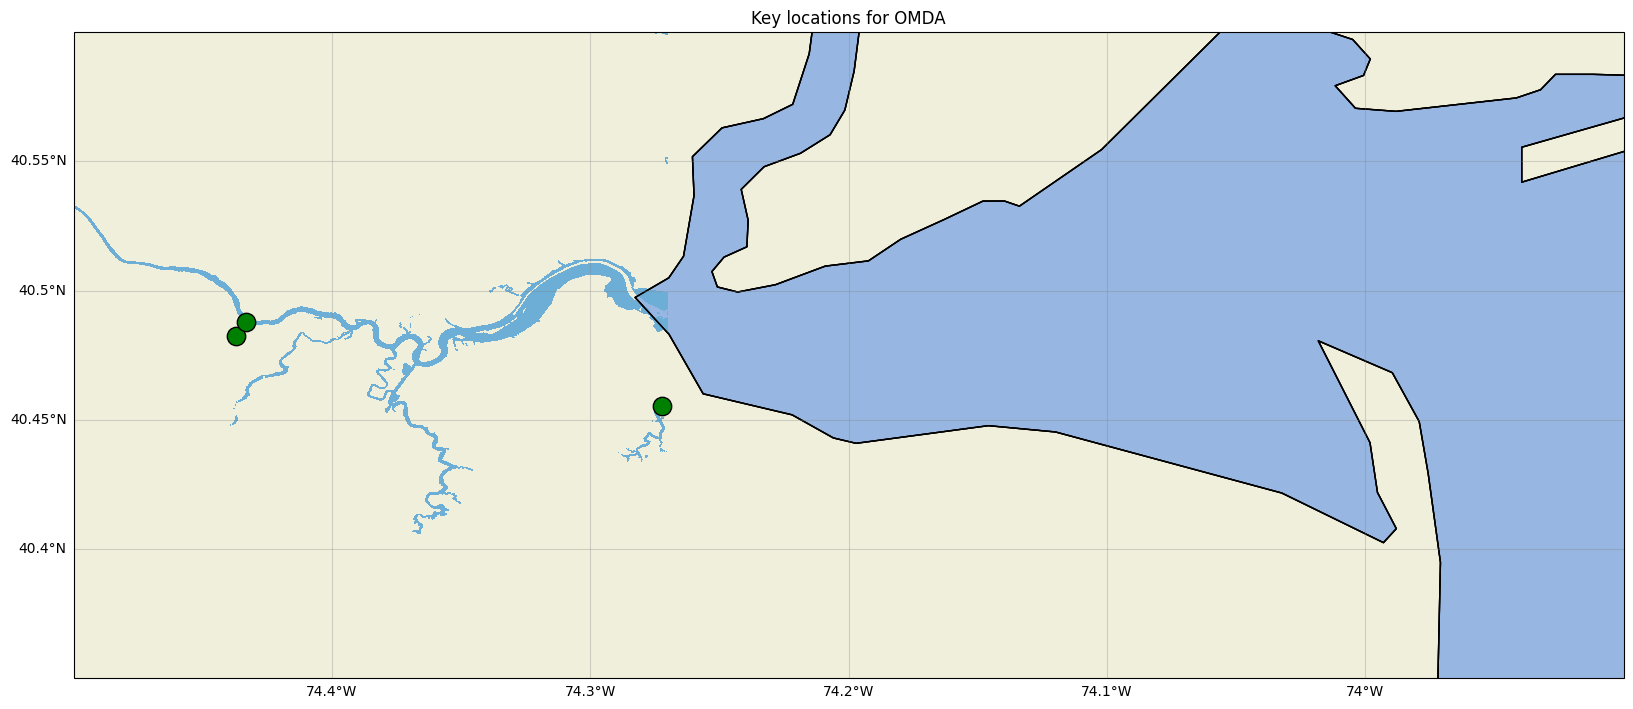

In [38]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

ax.scatter(labs['Longitude'], labs['Latitude'], s=175, c='green',edgecolor='black'); # Plots the individual points on the map

# Also, let's add a title and some information to our axis
plt.title('Key locations for OMDA')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# We can set the x and y limits of the plot using ax.set_extent
# This can be used to zoom in and out of particular areas of the map
lon1 = -74.5
lon2 = -73.9
lat1 = 40.35
lat2 = 40.6
extent=[lon1, lon2, lat1, lat2] # Play with this to zoom out enough to provide context
ax.set_extent(extent)

dpth_contours = [-5,0]
bathy = plt.contourf(raritan.longitude, raritan.latitude,raritan.z.transpose(),transform=ccrs.PlateCarree(),
                     cmap='Blues_r', levels=dpth_contours,zorder=0)



# Assignment: Make another high resolution map

**For this week's assignment, you are going to make just 1 high resolution map.** A map of the Sea Bed Monitoring locations provided by Dave. Bivalves at these sites are monitored monthly to assess their health as they grow!<br><br>
    - Load in the data from the file `'SBM site coordinates.csv'` using `pandas` and plot every point on the map<br>
    - Plot the points as dots using `scatter` and color them yellow<br>
    - Plot the location of the Haskin lab in red and label it in the legend<br>
    - Plot the map in the PlateCarree projection<br>
    - Add `OCEAN`, `LAND`, `STATES`, and `COASTLINE` cartopy features<br>
    - Be sure to include a title and coordinates on the axes<br>
    - Set the extent for the final map to --> `[-75.6, -74.75, 39.5, 38.6]`<br>
    - Plot Delaware Bay bathymetry using `plt.contourf()`. I have loaded in this dataset for you in the following cell.<br>
    - Subset the bathymetry using the latitude and longitude ranges given above. To do this, use the following code: `region = ds_etpo.sel(lon=slice(lon1, lon2), lat=slice(lat1, lat2))`. Then plot `region` using `plt.contourf()`<br>
    - In `plt.contourf()` set `levels` equal to `np.arange(-34,1,2)` (This is the depth contours to plot/color.<br>
    - **Bonus:** add a colorbar of the bathymetry. Hint, you will need to define the line of code you use for plotting the bathymetry, something like `bathy=plt.contourf(blah, blah, blah)`<br>


In [40]:
# ds_etpo = xr.open_dataset('bathy_etopo2_v2c.nc')  ## Not currently setup to work in colab
# ds_etpo

In [41]:
# sbm = pd.read_csv('SBM_site_coordinates.csv') #Not setup to work in colab
# sbm

In [43]:
# plt.figure(figsize=(20,10))
# ax = plt.axes(projection = ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND, edgecolor='black')
# ax.add_feature(cfeature.COASTLINE, edgecolor='black')
# ax.add_feature(cfeature.STATES, edgecolor='black')

# # Plots just one point and gives it a label based on the Location column
# ax.scatter(labs['Longitude'][0], labs['Latitude'][0], s=175, c='red',edgecolor='black', label=labs['Location'][0]);
# plt.legend() # adds a legend to the map
# ax.scatter(sbm['Longitude'], sbm['Latitude'], s=175, c='yellow',edgecolor='black'); # Plots the individual points on the map

# plt.title('Sea Bed Monitoring Locations in the Delaware Bay')

# # # Also, let's add a title and some information to our axis
# # plt.title('Key locations for OMDA')
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.3)
# gl.top_labels = False
# gl.right_labels = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# # We can set the x and y limits of the plot using ax.set_extent
# # This can be used to zoom in and out of particular areas of the map
# lon1 = -75.6
# lon2 = -74.75
# lat1 = 38.6
# lat2 = 39.5
# ax.set_extent([lon1, lon2, lat1, lat2])

# region = ds_etpo.sel(lon=slice(lon1, lon2), lat=slice(lat1, lat2))
# bathy = ax.contourf(region.lon, region.lat, region.topo,  cmap='Blues_r' ,  transform=ccrs.PlateCarree(), levels=np.arange(-34,1,2), zorder=0)
# cbar = plt.colorbar(bathy,label='Depth [meters]',pad=0.025, fraction=0.025)